In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

############################################
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
############################################
from sklearn.metrics import accuracy_score, precision_score, recall_score,roc_auc_score,f1_score,roc_curve
from imblearn.over_sampling import SMOTE
from collections import Counter


import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
df=pd.read_csv('/Users/jamilahalharbi/Desktop/dataset_full.csv')
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [5]:
x=df[df['phishing']> 0]
print(x.count())

qty_dot_url             30647
qty_hyphen_url          30647
qty_underline_url       30647
qty_slash_url           30647
qty_questionmark_url    30647
                        ...  
qty_redirects           30647
url_google_index        30647
domain_google_index     30647
url_shortened           30647
phishing                30647
Length: 112, dtype: int64


In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Data columns (total 112 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    qty_dot_url                 int64  
 1    qty_hyphen_url              int64  
 2    qty_underline_url           int64  
 3    qty_slash_url               int64  
 4    qty_questionmark_url        int64  
 5    qty_equal_url               int64  
 6    qty_at_url                  int64  
 7    qty_and_url                 int64  
 8    qty_exclamation_url         int64  
 9    qty_space_url               int64  
 10   qty_tilde_url               int64  
 11   qty_comma_url               int64  
 12   qty_plus_url                int64  
 13   qty_asterisk_url            int64  
 14   qty_hashtag_url             int64  
 15   qty_dollar_url              int64  
 16   qty_percent_url             int64  
 17   qty_tld_url                 int64  
 18   length_url                  int64  
 19   qt

In [7]:
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [8]:
df.isnull().values.any()

False

In [9]:
df[df<0]=0
df

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88642,3,1,0,0,0,0,0,0,0,0,...,1,3,1,3597,0,0,0,0,0,0
88643,2,0,0,0,0,0,0,0,0,0,...,1,2,2,591,0,2,0,0,0,0
88644,2,1,0,5,0,0,0,0,0,0,...,1,2,5,14391,1,0,0,0,0,1
88645,2,0,0,1,0,0,0,0,0,0,...,1,1,1,52,1,0,0,0,0,1


In [10]:
df.drop_duplicates(inplace=True)

In [11]:
x=df.iloc[:,0:111] # first column of data frame (first_name)
print(x)
y=df.iloc[:,-1] # last column of data frame (id)
print(y)

       qty_dot_url  qty_hyphen_url  qty_underline_url  qty_slash_url  \
0                3               0                  0              1   
1                5               0                  1              3   
2                2               0                  0              1   
3                4               0                  2              5   
4                2               0                  0              0   
...            ...             ...                ...            ...   
88642            3               1                  0              0   
88643            2               0                  0              0   
88644            2               1                  0              5   
88645            2               0                  0              1   
88646            2               0                  0              0   

       qty_questionmark_url  qty_equal_url  qty_at_url  qty_and_url  \
0                         0              0           0          

In [12]:
df.duplicated().sum()

0

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(69759, 111)
(17440, 111)
(69759,)
(17440,)


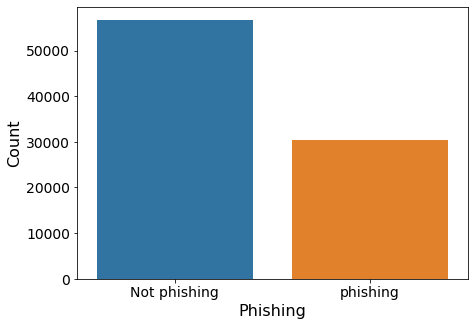

In [14]:
fig_dims = (7,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(df['phishing'],ax=ax)
g.set_xticklabels(['Not phishing','phishing'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Phishing',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

# applying the models without anything!!!

In [29]:
models = {}
# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier(oob_score = True)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()



In [30]:
accuracy, precision, recall,roc_auc, f1= {}, {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(x_train, y_train)
    
    # Prediction 
    predictions = models[key].predict(x_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    roc_auc[key]=roc_auc_score(predictions, y_test)
    f1[key]=f1_score(predictions, y_test)
    

In [31]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','ROC_AUC','F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['ROC_AUC'] = roc_auc.values() 
df_model['F1'] = f1.values()
df_model


,Accuracy,Precision,Recall,ROC_AUC,F1
Logistic Regression,0.881078,0.747565,0.892568,0.884467,0.813657
Support Vector Machines,0.762787,0.701172,0.646030,0.739728,0.672472
Decision Trees,0.954874,0.935612,0.934532,0.950124,0.935071
Random Forest,0.969094,0.960872,0.950670,0.964865,0.955743
Naive Bayes,0.803727,0.487865,0.902015,0.841504,0.633237
K-Nearest Neighbor,0.869037,0.807826,0.813737,0.855936,0.810771


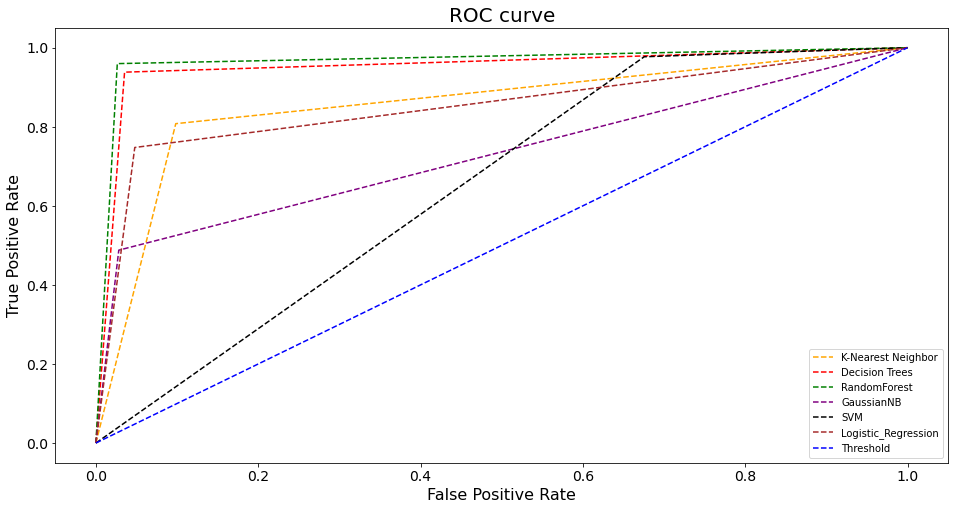

In [32]:
model1= DecisionTreeClassifier()
model1.fit(x_train, y_train)
predictions = model1.predict(x_test)
fpr1, tpr1, thresholds = roc_curve(y_test, predictions, pos_label=1)
###########
model2 = KNeighborsClassifier()
model2.fit(x_train, y_train)
predictions = model2.predict(x_test)
fpr2, tpr2, thresholds = roc_curve(y_test, predictions, pos_label=1)
###############
model3 = RandomForestClassifier(oob_score = True)
model3.fit(x_train, y_train)
predictions = model3.predict(x_test)
fpr3, tpr3, thresholds = roc_curve(y_test, predictions, pos_label=1)
################
model4 = GaussianNB()
model4.fit(x_train, y_train)
predictions = model4.predict(x_test)
fpr4, tpr4, thresholds = roc_curve(y_test, predictions, pos_label=1)
################
model5 = LinearSVC()
model5.fit(x_train, y_train)
predictions = model5.predict(x_test)
fpr5, tpr5, thresholds = roc_curve(y_test, predictions, pos_label=1)
###############
model6 = LogisticRegression()
model6.fit(x_train, y_train)
predictions = model6.predict(x_test)
fpr6, tpr6, thresholds = roc_curve(y_test, predictions, pos_label=1)
##############
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
##############
plt.figure(figsize=(16,8))
plt.plot(fpr2, tpr2, linestyle='--',color='orange',label= 'K-Nearest Neighbor')
plt.plot(fpr1, tpr1, linestyle='--',color='red',label= 'Decision Trees')
plt.plot(fpr3, tpr3, linestyle='--',color='green',label= 'RandomForest')
plt.plot(fpr4, tpr4, linestyle='--',color='purple',label= 'GaussianNB')
plt.plot(fpr5, tpr5, linestyle='--',color='black',label= 'SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='brown',label= 'Logistic_Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Threshold')
plt.title("ROC curve",fontsize=20)
plt.ylabel('True Positive Rate',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.legend(loc='best', prop={"size":10})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'qty_slash_directory'),
  Text(0, 1, 'directory_length'),
  Text(0, 2, 'qty_slash_url'),
  Text(0, 3, 'length_url'),
  Text(0, 4, 'time_domain_activation'),
  Text(0, 5, 'file_length'),
  Text(0, 6, 'qty_dot_file'),
  Text(0, 7, 'ttl_hostname'),
  Text(0, 8, 'asn_ip'),
  Text(0, 9, 'time_response'),
  Text(0, 10, 'qty_dot_domain'),
  Text(0, 11, 'time_domain_expiration'),
  Text(0, 12, 'domain_length'),
  Text(0, 13, 'qty_dot_directory'),
  Text(0, 14, 'qty_vowels_domain')])

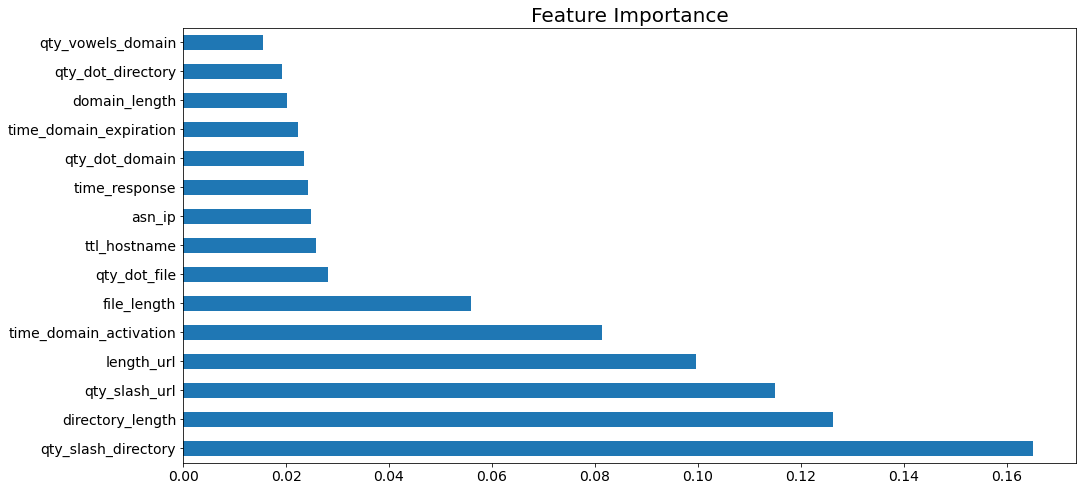

In [33]:
plt.title("Feature Importance",fontsize=20)
(pd.Series(model3.feature_importances_, index=x_train.columns)
   .nlargest(15)
   .plot(kind='barh',figsize=(16,8)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [34]:
model3.oob_score_

0.9690792585902894

# after applying SMOTE to balnce the data

In [35]:
smote = SMOTE()

# fit predictor and target variable
x_train_smote,y_train_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 45319, 1: 24440})
Resample dataset shape Counter({0: 45319, 1: 45319})


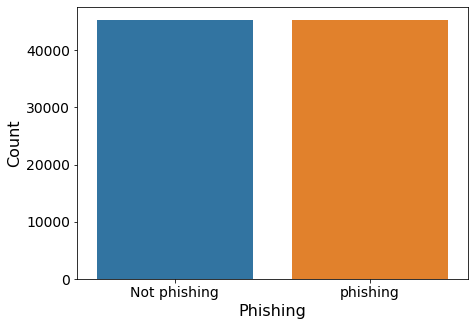

In [36]:
fig_dims = (7,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(y_train_smote,ax=ax)
g.set_xticklabels(['Not phishing','phishing'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Phishing',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [37]:
models = {}
# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier(oob_score = True)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()




In [38]:
accuracy, precision, recall,roc_auc, f1= {}, {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(x_train_smote, y_train_smote)
    
    # Prediction 
    predictions = models[key].predict(x_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    roc_auc[key]=roc_auc_score(predictions, y_test)
    f1[key]=f1_score(predictions, y_test)

In [39]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','ROC_AUC','F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['ROC_AUC'] = roc_auc.values() 
df_model['F1'] = f1.values()
df_model

,Accuracy,Precision,Recall,ROC_AUC,F1
Logistic Regression,0.896502,0.829123,0.867058,0.889101,0.847666
Support Vector Machines,0.745298,0.657751,0.627105,0.720065,0.642063
Decision Trees,0.953096,0.939904,0.926143,0.946955,0.932973
Random Forest,0.968463,0.967806,0.942899,0.962762,0.955190
Naive Bayes,0.816170,0.528479,0.901436,0.847903,0.666320
K-Nearest Neighbor,0.863016,0.859501,0.771945,0.846191,0.813374


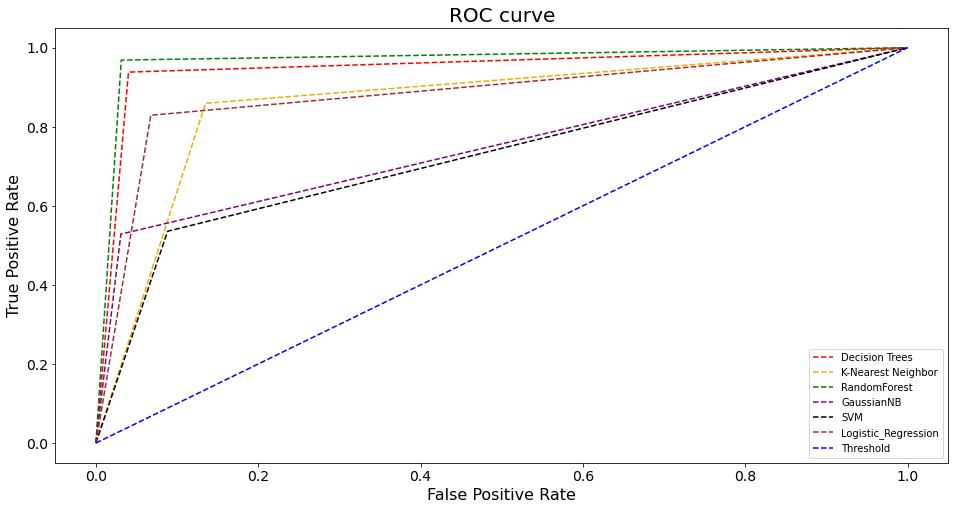

In [40]:
model1= DecisionTreeClassifier()
model1.fit(x_train_smote, y_train_smote)
predictions = model1.predict(x_test)
fpr1, tpr1, thresholds = roc_curve(y_test, predictions, pos_label=1)
###########
model2 = KNeighborsClassifier()
model2.fit(x_train_smote, y_train_smote)
predictions = model2.predict(x_test)
fpr2, tpr2, thresholds = roc_curve(y_test, predictions, pos_label=1)
###############
model3 = RandomForestClassifier(oob_score = True)
model3.fit(x_train_smote, y_train_smote)
predictions = model3.predict(x_test)
fpr3, tpr3, thresholds = roc_curve(y_test, predictions, pos_label=1)
################
model4 = GaussianNB()
model4.fit(x_train_smote, y_train_smote)
predictions = model4.predict(x_test)
fpr4, tpr4, thresholds = roc_curve(y_test, predictions, pos_label=1)
################
model5 = LinearSVC()
model5.fit(x_train_smote, y_train_smote)
predictions = model5.predict(x_test)
fpr5, tpr5, thresholds = roc_curve(y_test, predictions, pos_label=1)
###############
model6 = LogisticRegression()
model6.fit(x_train_smote, y_train_smote)
predictions = model6.predict(x_test)
fpr6, tpr6, thresholds = roc_curve(y_test, predictions, pos_label=1)
##############
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
##############
plt.figure(figsize=(16,8))
plt.plot(fpr1, tpr1, linestyle='--',color='red',label= 'Decision Trees')
plt.plot(fpr2, tpr2, linestyle='--',color='orange',label= 'K-Nearest Neighbor')
plt.plot(fpr3, tpr3, linestyle='--',color='green',label= 'RandomForest')
plt.plot(fpr4, tpr4, linestyle='--',color='purple',label= 'GaussianNB')
plt.plot(fpr5, tpr5, linestyle='--',color='black',label= 'SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='brown',label= 'Logistic_Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Threshold')
plt.title("ROC curve",fontsize=20)
plt.ylabel('True Positive Rate',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.legend(loc='best', prop={"size":10})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'directory_length'),
  Text(0, 1, 'qty_slash_url'),
  Text(0, 2, 'qty_slash_directory'),
  Text(0, 3, 'time_domain_activation'),
  Text(0, 4, 'length_url'),
  Text(0, 5, 'file_length'),
  Text(0, 6, 'qty_dot_domain'),
  Text(0, 7, 'asn_ip'),
  Text(0, 8, 'ttl_hostname'),
  Text(0, 9, 'time_domain_expiration'),
  Text(0, 10, 'time_response'),
  Text(0, 11, 'qty_dot_directory'),
  Text(0, 12, 'domain_length'),
  Text(0, 13, 'qty_dot_url'),
  Text(0, 14, 'qty_hyphen_url')])

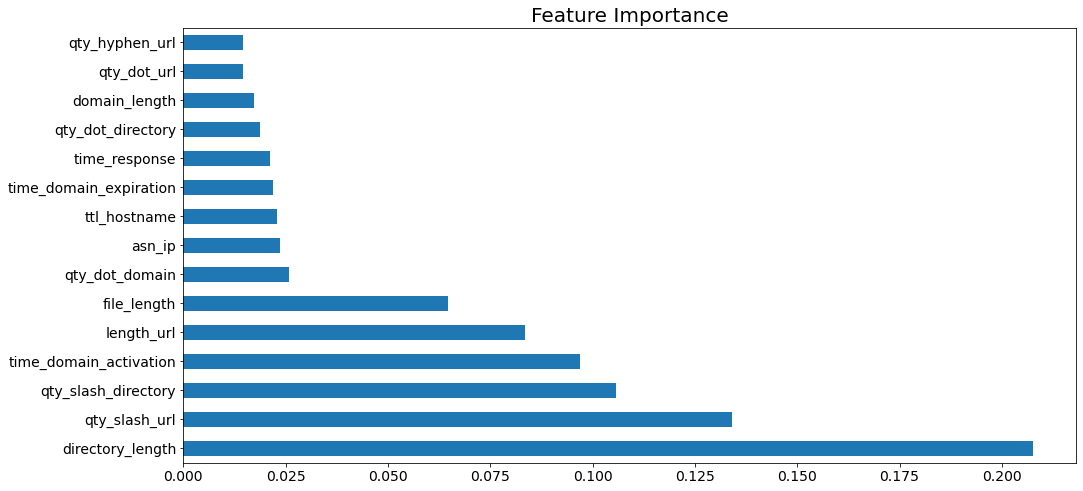

In [41]:
plt.title("Feature Importance",fontsize=20)
(pd.Series(model3.feature_importances_, index=x_train_smote.columns)
   .nlargest(15)
   .plot(kind='barh',figsize=(16,8)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [42]:
model3.oob_score_

0.9758600145634282

# after balancing the data, and scale

In [43]:
smote = SMOTE()

# fit predictor and target variable
x_train_smote,y_train_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_train_smote))

Original dataset shape Counter({0: 45319, 1: 24440})
Resample dataset shape Counter({0: 45319, 1: 45319})


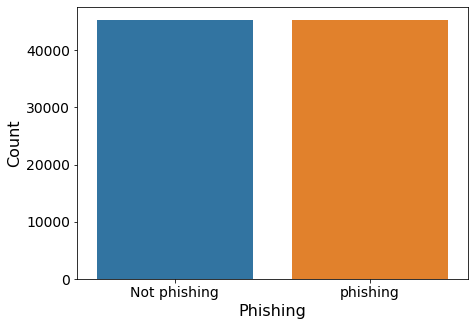

In [44]:
fig_dims = (7,5)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.countplot(y_train_smote,ax=ax)
g.set_xticklabels(['Not phishing','phishing'], fontsize = 18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Phishing',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_x_train = scaler.fit_transform(x_train_smote)
scaled_x_test = scaler.transform(x_test)



# scaled_x_train=preprocessing.scale(x_train_smote)

# scaled_x_test=preprocessing.scale(x_test)
# print(scaled_x_test)



# from sklearn.preprocessing import RobustScaler

# scaler = RobustScaler()

# scaled_x_train = scaler.fit_transform(x_train_smote)

# scaled_x_test = scaler.transform(x_test)

In [46]:
models = {}
# Logistic Regression
models['Logistic Regression'] = LogisticRegression()

# Support Vector Machines
models['Support Vector Machines'] = LinearSVC()

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier()

# Random Forest
models['Random Forest'] = RandomForestClassifier(oob_score = True)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

# K-Nearest Neighbors
models['K-Nearest Neighbor'] = KNeighborsClassifier()

In [47]:
accuracy, precision, recall,roc_auc, f1= {}, {}, {}, {}, {}

for key in models.keys():
    
    # Fit the classifier model
    models[key].fit(scaled_x_train, y_train_smote)
    
    # Prediction 
    predictions = models[key].predict(scaled_x_test)
    
    # Calculate Accuracy, Precision and Recall Metrics
    accuracy[key] = accuracy_score(predictions, y_test)
    precision[key] = precision_score(predictions, y_test)
    recall[key] = recall_score(predictions, y_test)
    roc_auc[key]=roc_auc_score(predictions, y_test)
    f1[key]=f1_score(predictions, y_test)

In [48]:
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall','ROC_AUC','F1'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['ROC_AUC'] = roc_auc.values() 
df_model['F1'] = f1.values()
df_model

,Accuracy,Precision,Recall,ROC_AUC,F1
Logistic Regression,0.933544,0.922239,0.890341,0.924080,0.906009
Support Vector Machines,0.932970,0.916460,0.893305,0.924116,0.904735
Decision Trees,0.952924,0.940895,0.924862,0.946559,0.932810
Random Forest,0.967775,0.966980,0.941791,0.961984,0.954220
Naive Bayes,0.728268,0.231138,0.944669,0.826420,0.371402
K-Nearest Neighbor,0.948337,0.939739,0.913937,0.940691,0.926659


[0.         0.04032329 1.        ] [0.         0.93957405 1.        ] [2 1 0]
[0.         0.04708776 1.        ] [0.         0.93973914 1.        ] [2 1 0]
[0.         0.03145041 1.        ] [0.         0.96929173 1.        ] [2 1 0]
[0.         0.00720372 1.        ] [0.         0.23113753 1.        ] [2 1 0]
[0.        0.0576298 1.       ] [0.         0.91712069 1.        ] [2 1 0]
[0.         0.06044101 1.        ] [0.         0.92223873 1.        ] [2 1 0]
[0. 1.] [0. 1.]


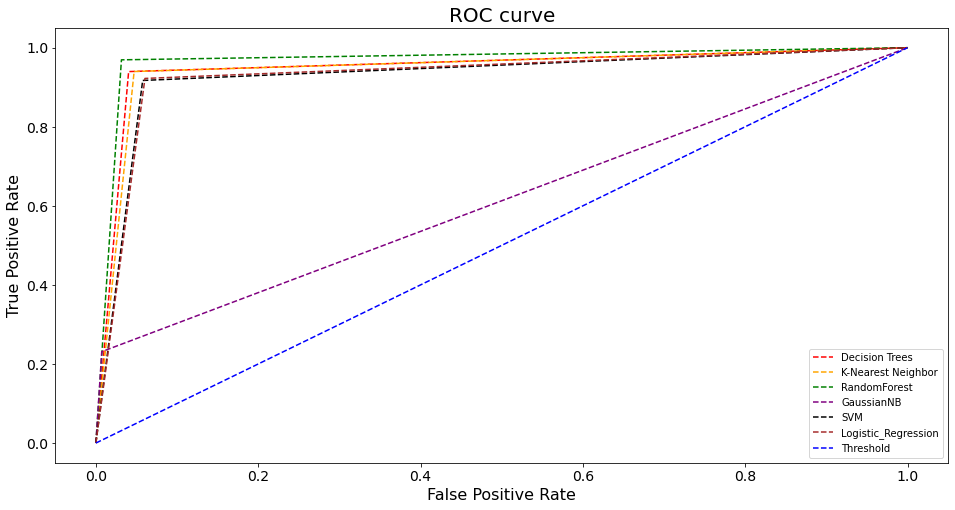

In [49]:
model1= DecisionTreeClassifier()
model1.fit(scaled_x_train, y_train_smote)
predictions = model1.predict(scaled_x_test)
fpr1, tpr1, thresholds = roc_curve(y_test, predictions, pos_label=1)
print(fpr1,tpr1,thresholds)
###########
model2 = KNeighborsClassifier()
model2.fit(scaled_x_train, y_train_smote)
predictions = model2.predict(scaled_x_test)
fpr2, tpr2, thresholds = roc_curve(y_test, predictions, pos_label=1)
print(fpr2,tpr2,thresholds)

###############
model3 = RandomForestClassifier(oob_score = True)
model3.fit(scaled_x_train, y_train_smote)
predictions = model3.predict(scaled_x_test)
fpr3, tpr3, thresholds = roc_curve(y_test, predictions, pos_label=1)
print(fpr3,tpr3,thresholds)

################
model4 = GaussianNB()
model4.fit(scaled_x_train, y_train_smote)
predictions = model4.predict(scaled_x_test)
fpr4, tpr4, thresholds = roc_curve(y_test, predictions, pos_label=1)
print(fpr4,tpr4,thresholds)

################
model5 = LinearSVC()
model5.fit(scaled_x_train, y_train_smote)
predictions = model5.predict(scaled_x_test)
fpr5, tpr5, thresholds = roc_curve(y_test, predictions, pos_label=1)
print(fpr5,tpr5,thresholds)

###############
model6 = LogisticRegression()
model6.fit(scaled_x_train, y_train_smote)
predictions = model6.predict(scaled_x_test)
fpr6, tpr6, thresholds = roc_curve(y_test, predictions, pos_label=1)
print(fpr6,tpr6,thresholds)

##############
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
print(p_fpr,p_tpr)

##############
plt.figure(figsize=(16,8))
plt.plot(fpr1, tpr1, linestyle='--',color='red',label= 'Decision Trees')
plt.plot(fpr2, tpr2, linestyle='--',color='orange',label= 'K-Nearest Neighbor')
plt.plot(fpr3, tpr3, linestyle='--',color='green',label= 'RandomForest')
plt.plot(fpr4, tpr4, linestyle='--',color='purple',label= 'GaussianNB')
plt.plot(fpr5, tpr5, linestyle='--',color='black',label= 'SVM')
plt.plot(fpr6, tpr6, linestyle='--',color='brown',label= 'Logistic_Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue',label='Threshold')
plt.title("ROC curve",fontsize=20)
plt.ylabel('True Positive Rate',fontsize=16)
plt.xlabel('False Positive Rate',fontsize=16)
plt.legend(loc='best', prop={"size":10})

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'directory_length'),
  Text(0, 1, 'qty_slash_url'),
  Text(0, 2, 'qty_slash_directory'),
  Text(0, 3, 'time_domain_activation'),
  Text(0, 4, 'length_url'),
  Text(0, 5, 'file_length'),
  Text(0, 6, 'qty_dot_domain'),
  Text(0, 7, 'asn_ip'),
  Text(0, 8, 'ttl_hostname'),
  Text(0, 9, 'time_response'),
  Text(0, 10, 'qty_dot_directory'),
  Text(0, 11, 'time_domain_expiration'),
  Text(0, 12, 'domain_length'),
  Text(0, 13, 'qty_vowels_domain'),
  Text(0, 14, 'qty_dot_url')])

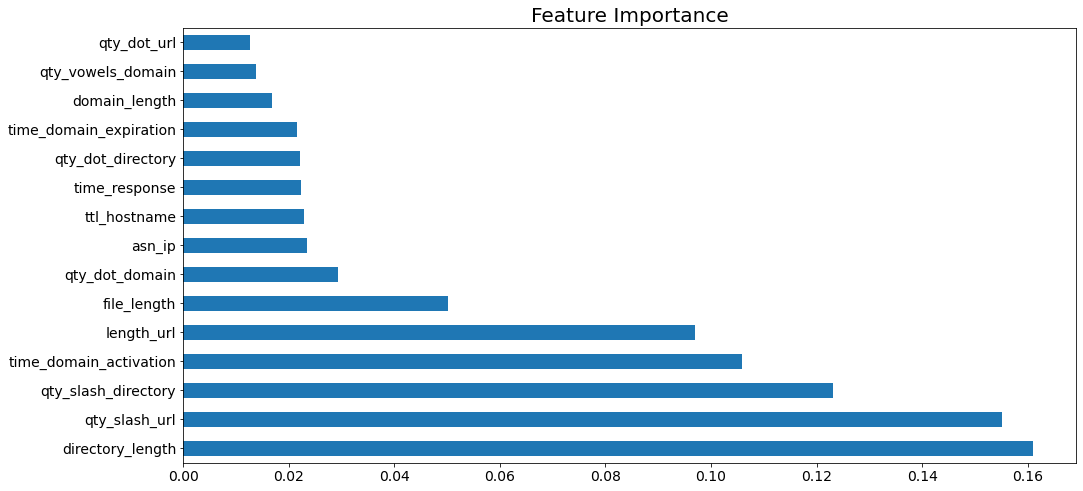

In [50]:
plt.title("Feature Importance",fontsize=20)
(pd.Series(model3.feature_importances_, index=x_train_smote.columns)
   .nlargest(15)
   .plot(kind='barh',figsize=(16,8)))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [51]:
model3.oob_score_

0.9758158829629957